# Intrusion Detection Analysis on NSL-KDD Data Set using various Feature Selection Techniques


A sample analysis of the NSL-KDD data set is given. 

First, the data is analysed using Random Forest classifier and Multilayer Perceptron. Later, same learning algorithms are used to analyse the data but after applying various feature selection techniques to the data set.

#### AIM:-
- Whether feature selection techniques yield better analysis results as compared to normal analysis results or not
- Propose possible methods for network intrusion detection
- Analyse different feature selection techniques

The various feature selection techniques used are:- 
- Feature Importance
- Recursive Feature Elimination
- Anova-F Test

#### TASK DESCRIPTION
Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.  The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between <b>bad connections, called intrusions or attacks, and good normal connections</b>.

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.

The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

- DOS: denial-of-service, e.g. syn flood
- R2L: unauthorized access from a remote machine, e.g. guessing password
- U2R:  unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks
- probing: surveillance and other probing, e.g., port scanning

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of <b>24 training attack types</b>, with an <b>additional 14 types in the test data</b> only. 

#### DATA SET DESCRIPTION
The NSL-KDD data set has the following advantages over the original KDD data set:

- It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.
- There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.
- The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.
- The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.

## DATA LOADING 

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
train = pd.read_csv('/home/vinay/Downloads/NSL-KDD/KDDTrain+.txt', sep=",", header=None)
train.columns=(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","learners"])
train.drop(columns=['learners'],inplace=True)
print("TRAIN DATA SET")
print(train.head())
print('----------------------------------------------------------------------------------------------')
test = pd.read_csv('/home/vinay/Downloads/NSL-KDD/KDDTest+.txt', sep=",", header=None)
test.columns=(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","learners"])
test.drop(columns=['learners'],inplace=True)
print("TEST DATA SET")
print(test.head())

TRAIN DATA SET
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10             

In [2]:
print('TRAIN DATA SET column and data types')
print(train.columns)
print(train.dtypes)
print('-----------------------------------------------------------------------------------------')
print('TEST DATA SET column and data types')
print(test.columns)
print(test.dtypes)

TRAIN DATA SET column and data types
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')
duration                         int64
protocol_type                   object
service                         o

## DATA DICTIONARY

In [3]:
print('TRAIN DICTIONARY')
traindict=pd.DataFrame(train.dtypes)
traindict['MissingValues']=train.isnull().sum()
traindict['UniqueValues']=train.nunique()
traindict['Count']=train.count()
traindict=traindict.rename(columns={0:'DataType'})
print(traindict)
print('-----------------------------------------------------------------------------------------')
print('TEST DICTIONARY')
testdict=pd.DataFrame(test.dtypes)
testdict['MissingValues']=test.isnull().sum()
testdict['UniqueValues']=test.nunique()
testdict['Count']=test.count()
testdict=testdict.rename(columns={0:'DataType'})
print(testdict)

TRAIN DICTIONARY
                            DataType  MissingValues  UniqueValues   Count
duration                       int64              0          2981  125973
protocol_type                 object              0             3  125973
service                       object              0            70  125973
flag                          object              0            11  125973
src_bytes                      int64              0          3341  125973
dst_bytes                      int64              0          9326  125973
land                           int64              0             2  125973
wrong_fragment                 int64              0             3  125973
urgent                         int64              0             4  125973
hot                            int64              0            28  125973
num_failed_logins              int64              0             6  125973
logged_in                      int64              0             2  125973
num_compromised      

## DESCRIPTIVE STATISTICS
'<b>OBJECT</b>' type and '<b>NUMBER</b>' type

In [4]:
print('TRAIN DESCRIPTION')
print(train.describe(include=['object']))
print('-------------------------------------------------------')
print(train.describe(include=['number']))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('TEST DESCRIPTION')
print(test.describe(include=['object']))
print('-------------------------------------------------------')
print(test.describe(include=['number']))

TRAIN DESCRIPTION
       protocol_type service    flag  labels
count         125973  125973  125973  125973
unique             3      70      11      23
top              tcp    http      SF  normal
freq          102689   40338   74945   67343
-------------------------------------------------------
           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.00

Below is a dictionary created to map the normal intrusion types to 'normal' category and various attack types to their respective attack category ('DoS', 'Probe', 'U2R', 'R2L'). Nominal, binary and numeric variables are separated into separate lists as well.

In [5]:
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"])

nominal_inx = [1, 2, 3]
binary_inx = [6, 11, 13, 14, 20, 21]
numeric_inx = list(set(range(41)).difference(nominal_inx).difference(binary_inx))

nominal_cols = col_names[nominal_inx].tolist()
binary_cols = col_names[binary_inx].tolist()
numeric_cols = col_names[numeric_inx].tolist()

In [6]:
train['labels']=train['labels'].map(attack_dict)
print(train['labels'])
print("--------------------------------------------")
test['labels']=test['labels'].map(attack_dict)
print(test['labels'])

0         normal
1         normal
2            DoS
3         normal
4         normal
5            DoS
6            DoS
7            DoS
8            DoS
9            DoS
10           DoS
11           DoS
12        normal
13           R2L
14           DoS
15           DoS
16        normal
17         Probe
18        normal
19        normal
20           DoS
21           DoS
22        normal
23        normal
24           DoS
25        normal
26           DoS
27        normal
28        normal
29        normal
           ...  
125943    normal
125944    normal
125945    normal
125946       DoS
125947     Probe
125948       DoS
125949    normal
125950       DoS
125951    normal
125952    normal
125953       DoS
125954    normal
125955    normal
125956    normal
125957    normal
125958       DoS
125959    normal
125960    normal
125961    normal
125962    normal
125963    normal
125964       DoS
125965    normal
125966       DoS
125967    normal
125968       DoS
125969    normal
125970    norm

## EXPLORATORY DATA ANALYSIS

The count and percentage of different attack types (DoS, Probe, R2L, U2R) and 'normal' type in train and test data set are shown in a bar plot below.

normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: labels, dtype: int64
--------------------------------------------
normal    0.534583
DoS       0.364578
Probe     0.092528
R2L       0.007899
U2R       0.000413
Name: labels, dtype: float64
--------------------------------------------
--------------------------------------------
normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: labels, dtype: int64
--------------------------------------------
normal    0.430758
DoS       0.330820
R2L       0.122161
Probe     0.107390
U2R       0.008872
Name: labels, dtype: float64


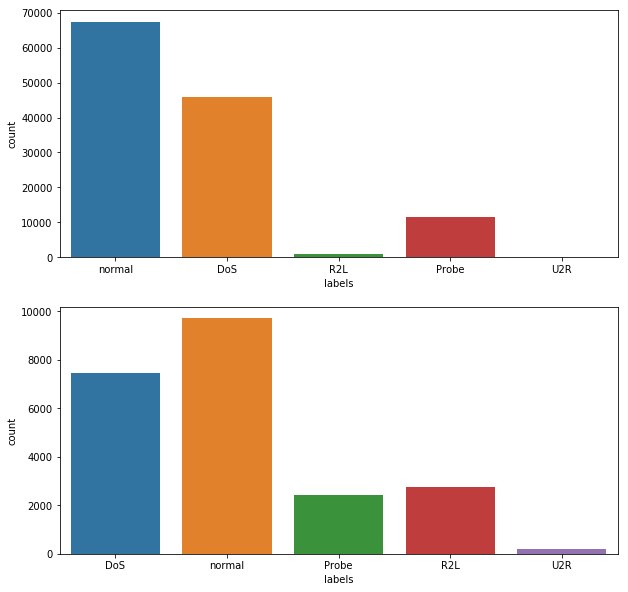

In [7]:
import seaborn as sns
print(train['labels'].value_counts())
print("--------------------------------------------")
print(train.labels.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.countplot('labels',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['labels'].value_counts())
print("--------------------------------------------")
print(test.labels.value_counts(normalize=True))

sns.countplot('labels',data=test,ax=axes[1])

The count and percentage of different protocol types present in train and test data set are shown in a bar plot below.

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64
--------------------------------------------
tcp     0.815167
udp     0.119018
icmp    0.065816
Name: protocol_type, dtype: float64
--------------------------------------------
--------------------------------------------
tcp     18880
udp      2621
icmp     1043
Name: protocol_type, dtype: int64
--------------------------------------------
tcp     0.837473
udp     0.116262
icmp    0.046265
Name: protocol_type, dtype: float64


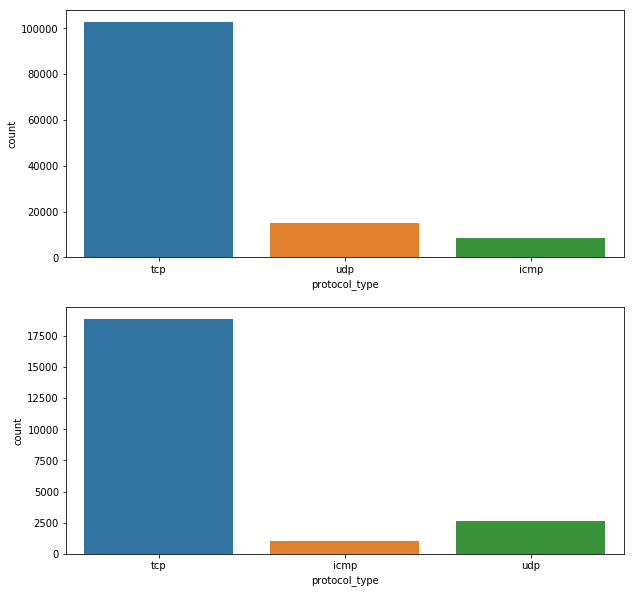

In [8]:
print(train['protocol_type'].value_counts())
print("--------------------------------------------")
print(train.protocol_type.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.countplot('protocol_type',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['protocol_type'].value_counts())
print("--------------------------------------------")
print(test.protocol_type.value_counts(normalize=True))

sns.countplot('protocol_type',data=test,ax=axes[1])

The count and percentage of different 'service' types in train and test data set are shown in a bar plot below.

http           40338
private        21853
domain_u        9043
smtp            7313
ftp_data        6860
eco_i           4586
other           4359
ecr_i           3077
telnet          2353
finger          1767
ftp             1754
auth             955
Z39_50           862
uucp             780
courier          734
bgp              710
whois            693
uucp_path        689
iso_tsap         687
time             654
imap4            647
nnsp             630
vmnet            617
urp_i            602
domain           569
ctf              563
csnet_ns         545
supdup           544
discard          538
http_443         530
               ...  
klogin           433
login            429
ldap             410
netbios_dgm      405
sunrpc           381
netbios_ssn      362
netstat          360
netbios_ns       347
ssh              311
kshell           299
nntp             296
pop_3            264
sql_net          245
IRC              187
ntp_u            168
rje               86
remote_job   

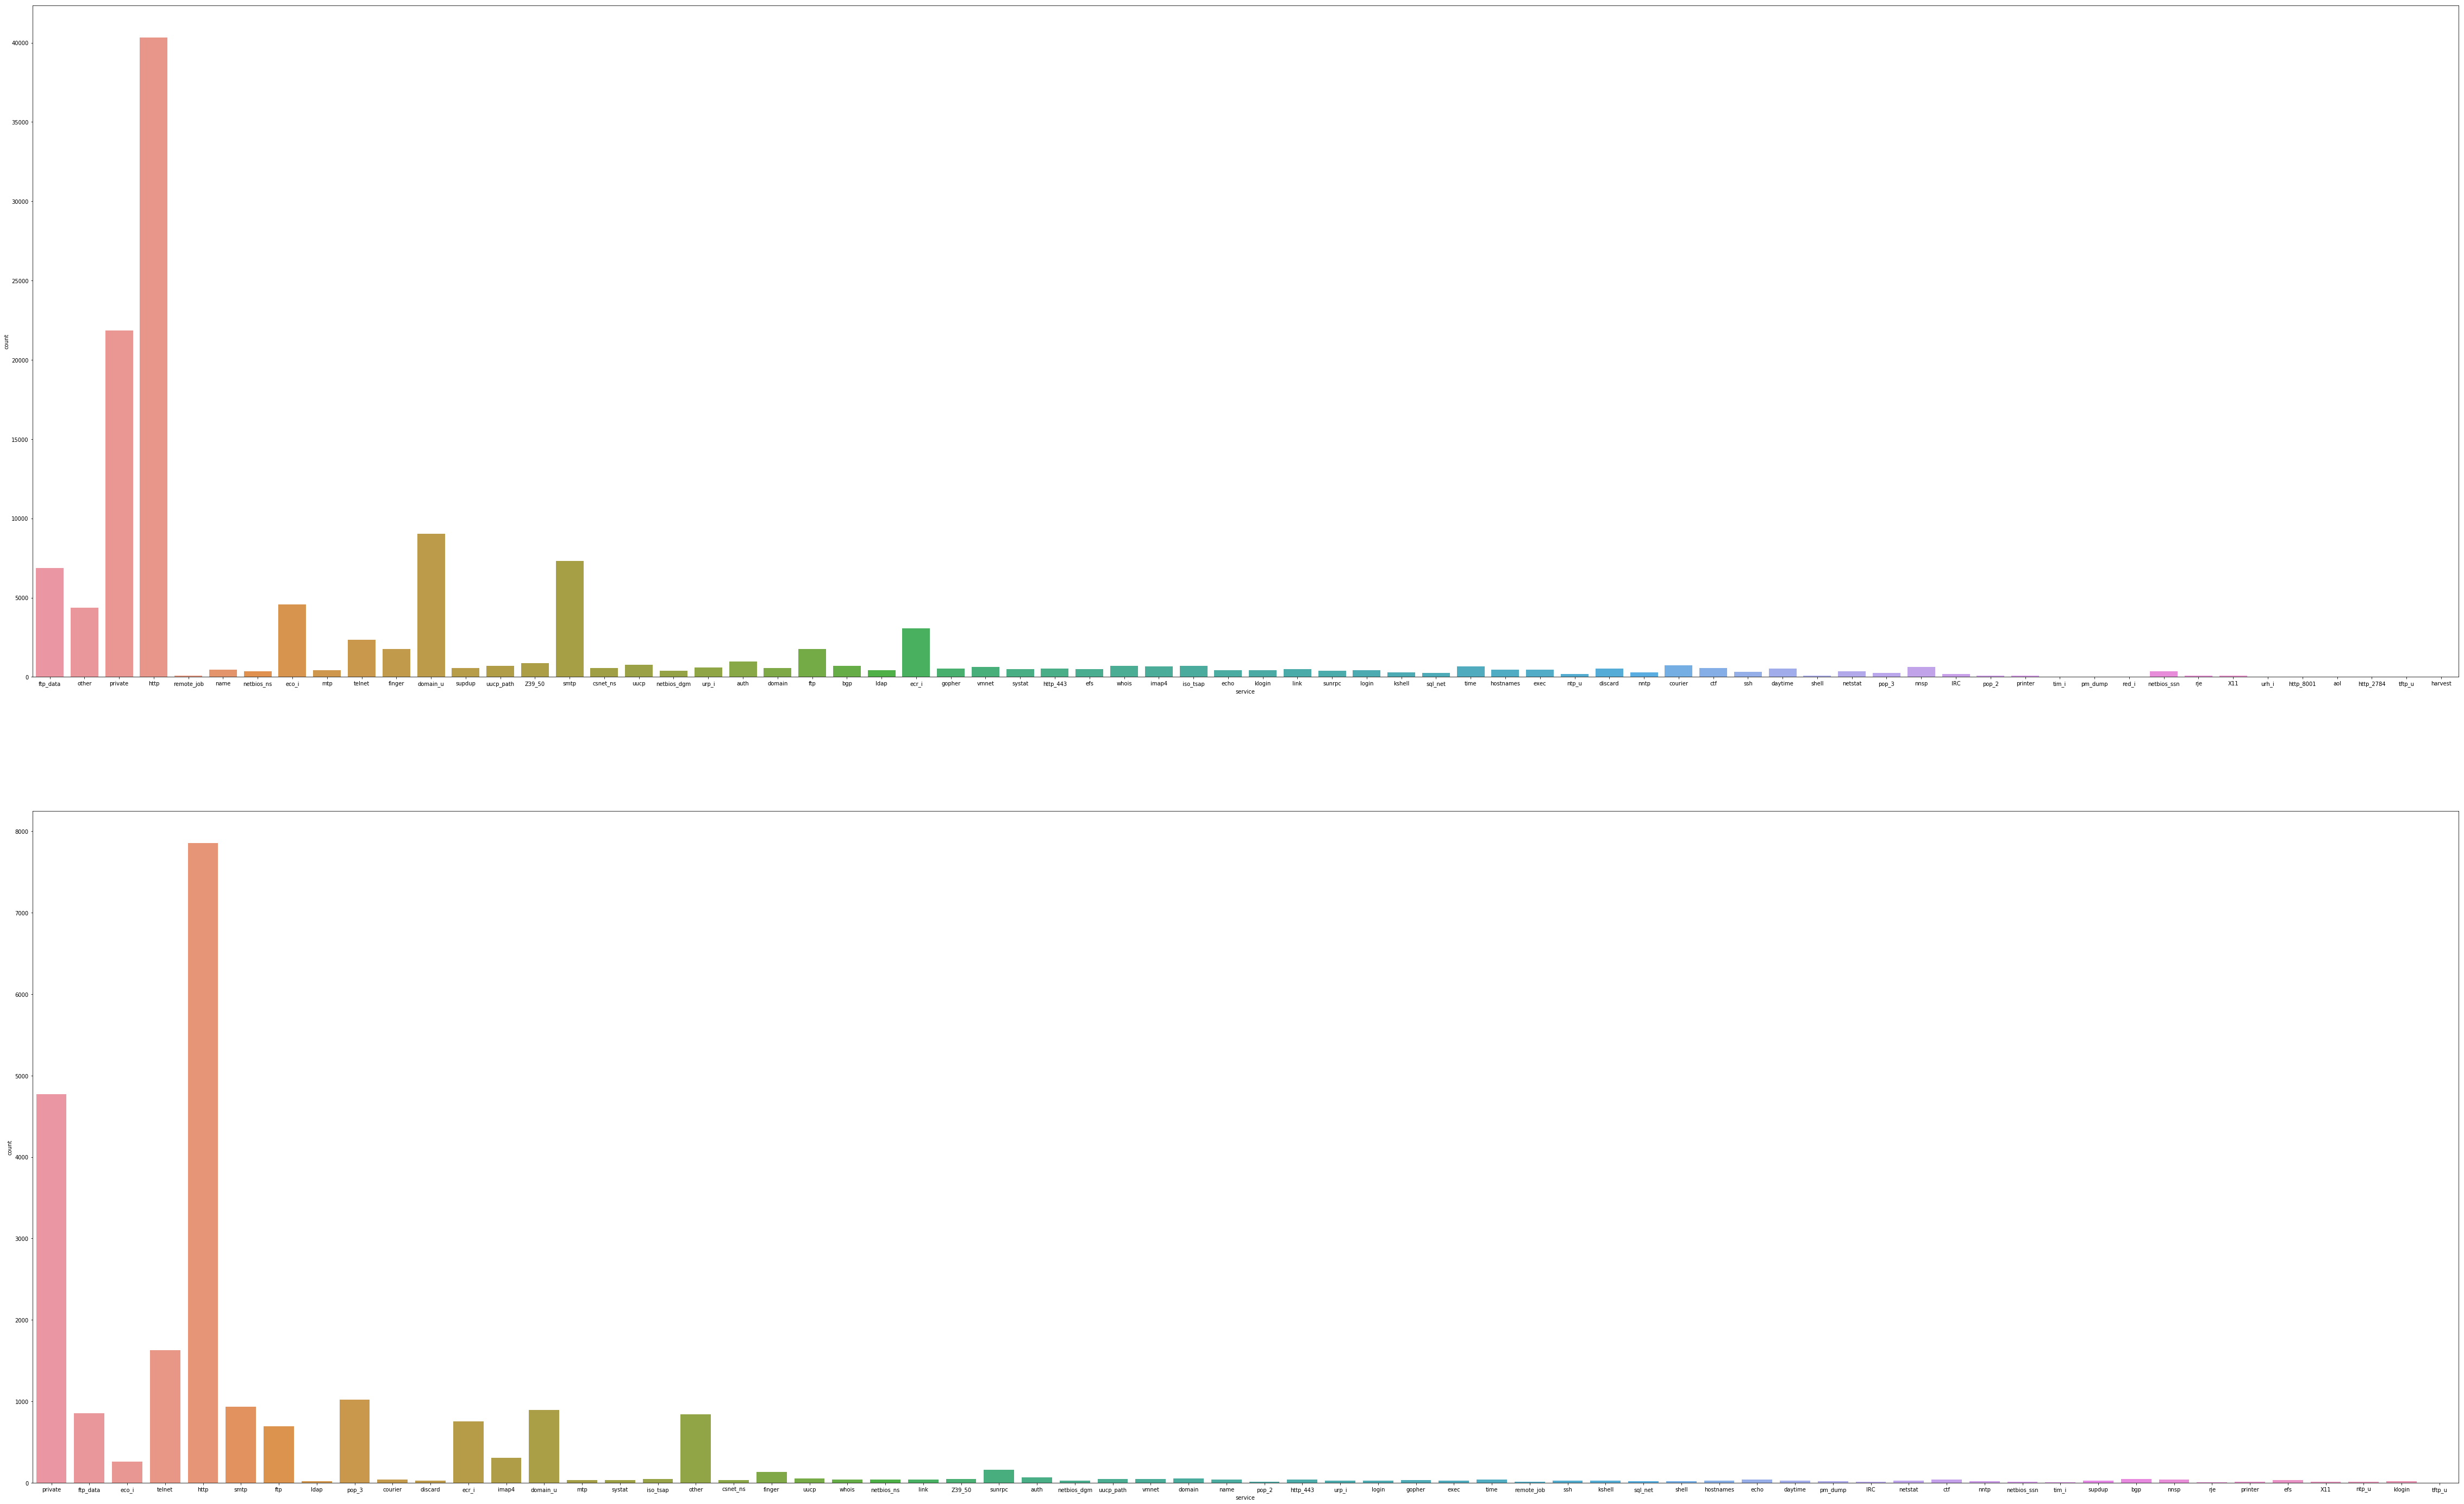

In [9]:
print(train['service'].value_counts())
print("--------------------------------------------")
print(train.service.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(80,50))
sns.countplot('service',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['service'].value_counts())
print("--------------------------------------------")
print(test.service.value_counts(normalize=True))

sns.countplot('service',data=test,ax=axes[1])

The count and percentage of different 'flag' types in train and test data set are shown in a bar plot below.

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64
--------------------------------------------
SF        0.594929
S0        0.276655
REJ       0.089170
RSTR      0.019218
RSTO      0.012399
S1        0.002897
SH        0.002151
S2        0.001008
RSTOS0    0.000818
S3        0.000389
OTH       0.000365
Name: flag, dtype: float64
--------------------------------------------
--------------------------------------------
SF        14875
REJ        3850
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64
--------------------------------------------
SF        0.659821
REJ       0.170777
S0        0.089292
RSTO      0.034289
RSTR      0.029675
S3        0.011045
SH        0.003238
S1        0.000932
S2        0.000665
OTH       0

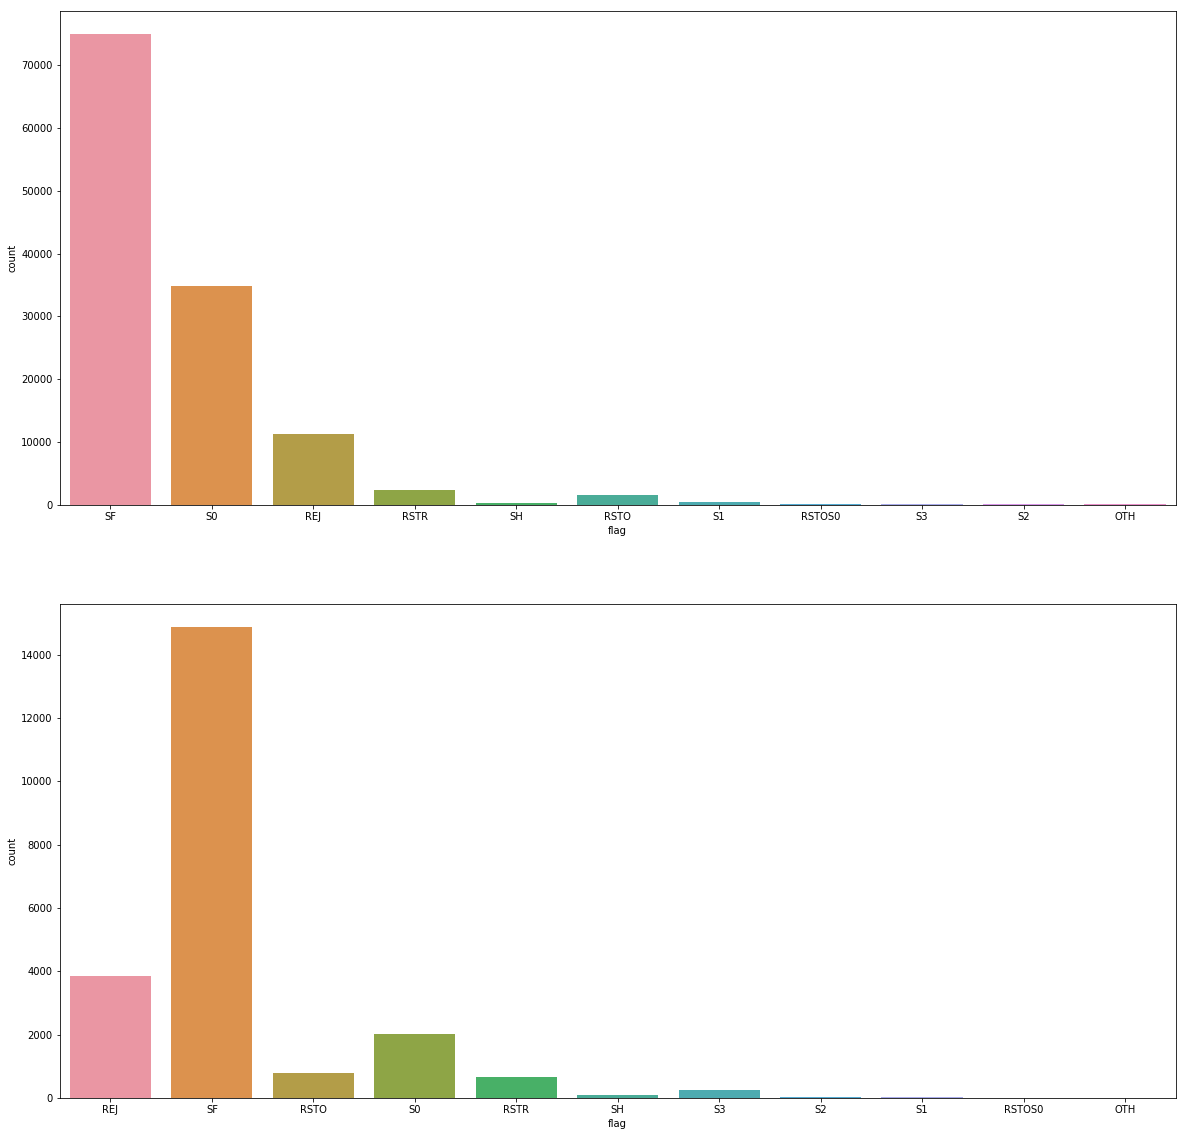

In [10]:
print(train['flag'].value_counts())
print("--------------------------------------------")
print(train.flag.value_counts(normalize=True))

fig,axes=plt.subplots(2,1,figsize=(20,20))
sns.countplot('flag',data=train,ax=axes[0])

print("--------------------------------------------")
print("--------------------------------------------")
print(test['flag'].value_counts())
print("--------------------------------------------")
print(test.flag.value_counts(normalize=True))

sns.countplot('flag',data=test,ax=axes[1])

In [11]:
print(train.groupby('protocol_type')['labels'].value_counts())
print("--------------------------------------------")
print(test.groupby('protocol_type')['labels'].value_counts())

protocol_type  labels
icmp           Probe      4135
               DoS        2847
               normal     1309
tcp            normal    53600
               DoS       42188
               Probe      5857
               R2L         995
               U2R          49
udp            normal    12434
               Probe      1664
               DoS         892
               U2R           3
Name: labels, dtype: int64
--------------------------------------------
protocol_type  labels
icmp           DoS        706
               Probe      240
               normal      93
               R2L          4
tcp            normal    7842
               DoS       6738
               R2L       2236
               Probe     1864
               U2R        200
udp            normal    1776
               R2L        514
               Probe      317
               DoS         14
Name: labels, dtype: int64


Distribution of different protocol types in different intrusion types is visualized below.

labels             DoS   Probe   R2L   U2R   normal
protocol_type                                      
icmp            2847.0  4135.0  null  null   1309.0
tcp            42188.0  5857.0   995    49  53600.0
udp              892.0  1664.0  null     3  12434.0
--------------------------------------------
labels            DoS   Probe     R2L   U2R  normal
protocol_type                                      
icmp            706.0   240.0     4.0  null    93.0
tcp            6738.0  1864.0  2236.0   200  7842.0
udp              14.0   317.0   514.0  null  1776.0


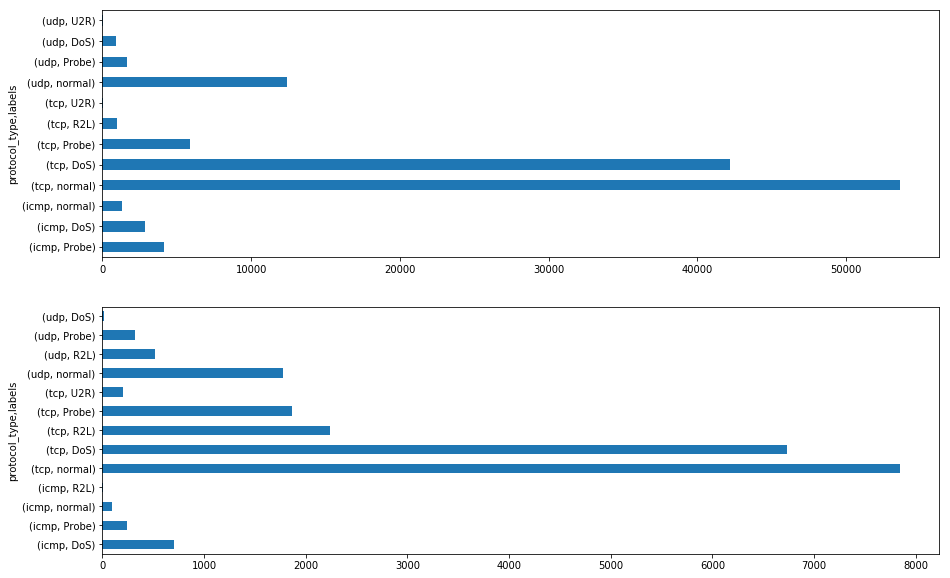

In [12]:
print(train.groupby('protocol_type')['labels'].value_counts().unstack().fillna('null'))

figbi, axesbi = plt.subplots(2,1,figsize=(15, 10))
train.groupby('protocol_type')['labels'].value_counts().plot(kind='barh',ax=axesbi[0])

print("--------------------------------------------")
print(test.groupby('protocol_type')['labels'].value_counts().unstack().fillna('null'))
test.groupby('protocol_type')['labels'].value_counts().plot(kind='barh',ax=axesbi[1])

In [13]:
print(train.groupby('service')['labels'].value_counts())
print("--------------------------------------------")
print(test.groupby('service')['labels'].value_counts())

service    labels
IRC        normal     186
           Probe        1
X11        normal      67
           Probe        6
Z39_50     DoS        851
           Probe       11
aol        Probe        2
auth       DoS        703
           normal     236
           Probe       16
bgp        DoS        699
           Probe       11
courier    DoS        726
           Probe        8
csnet_ns   DoS        533
           Probe       12
ctf        DoS        538
           Probe       25
daytime    DoS        503
           Probe       18
discard    DoS        520
           Probe       18
domain     DoS        508
           normal      38
           Probe       23
domain_u   normal    9034
           Probe        9
echo       DoS        416
           Probe       18
eco_i      Probe     4089
                     ... 
ssh        Probe       25
           normal       5
sunrpc     DoS        369
           Probe       12
supdup     DoS        528
           Probe       16
systat     DoS      

Distribution of different service types in different intrusion types is visualized below.

labels        DoS Probe   R2L   U2R normal
service                                   
IRC          null     1  null  null    186
X11          null     6  null  null     67
Z39_50        851    11  null  null   null
aol          null     2  null  null   null
auth          703    16  null  null    236
bgp           699    11  null  null   null
courier       726     8  null  null   null
csnet_ns      533    12  null  null   null
ctf           538    25  null  null   null
daytime       503    18  null  null   null
discard       520    18  null  null   null
domain        508    23  null  null     38
domain_u     null     9  null  null   9034
echo          416    18  null  null   null
eco_i        null  4089  null  null    497
ecr_i        2844    43  null  null    190
efs           478     7  null  null   null
exec          465     9  null  null   null
finger       1168    54  null  null    545
ftp           489    32   312     3    918
ftp_data     1209    51   604    12   4984
gopher     

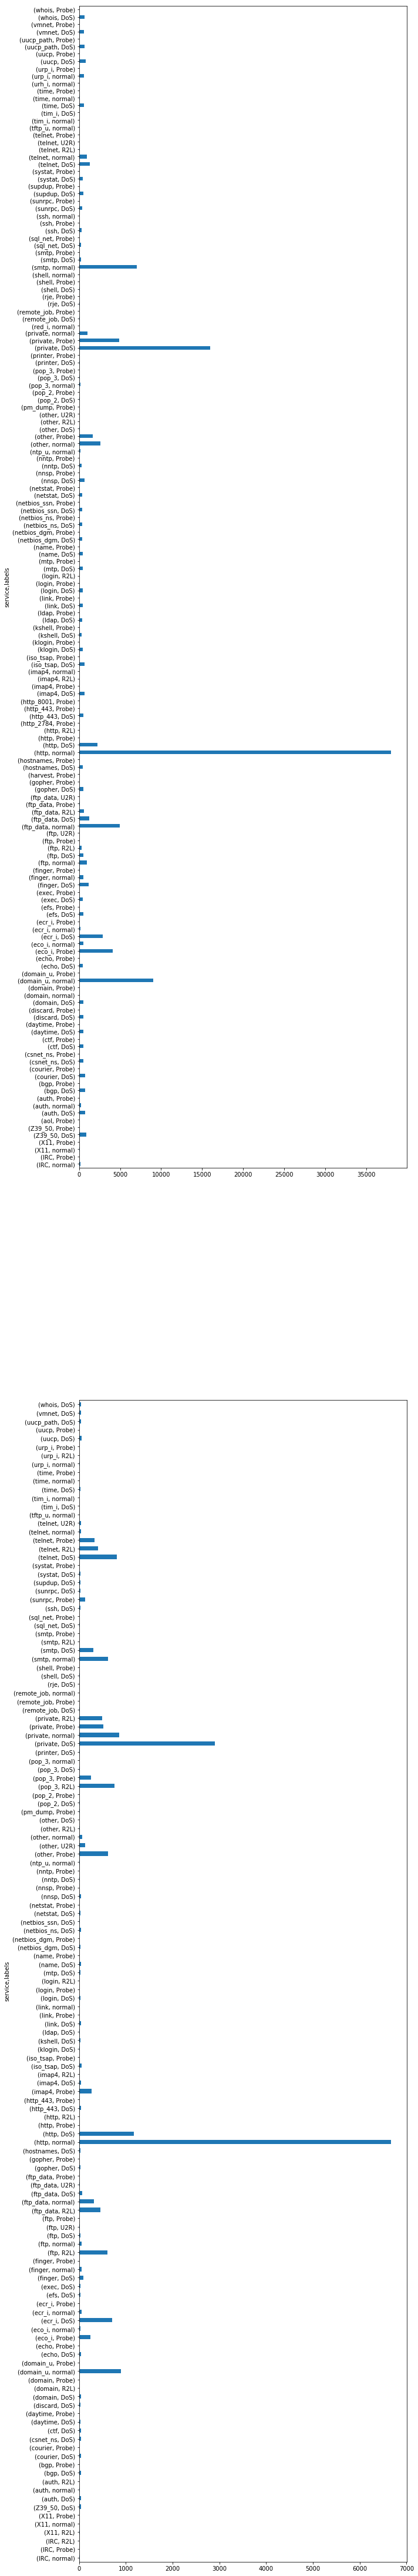

In [14]:
print(train.groupby('service')['labels'].value_counts().unstack().fillna('null'))

figbi, axesbi = plt.subplots(2,1,figsize=(10, 80))
train.groupby('service')['labels'].value_counts().plot(kind='barh',ax=axesbi[0])

print("--------------------------------------------")
print(test.groupby('service')['labels'].value_counts().unstack().fillna('null'))

test.groupby('service')['labels'].value_counts().plot(kind='barh',ax=axesbi[1])

In [15]:
print(train.groupby('flag')['labels'].value_counts())
print("--------------------------------------------")
print(test.groupby('flag')['labels'].value_counts())

flag    labels
OTH     Probe        35
        normal       11
REJ     DoS        5671
        Probe      2869
        normal     2693
RSTO    DoS        1216
        normal      219
        Probe        80
        R2L          46
        U2R           1
RSTOS0  Probe       103
RSTR    Probe      2180
        normal      146
        DoS          90
        R2L           5
S0      DoS       34344
        normal      354
        Probe       153
S1      normal      361
        DoS           2
        Probe         1
        R2L           1
S2      normal      119
        DoS           5
        Probe         2
        R2L           1
S3      normal       45
        R2L           3
        Probe         1
SF      normal    63393
        Probe      5967
        DoS        4599
        R2L         935
        U2R          51
SH      Probe       265
        R2L           4
        normal        2
Name: labels, dtype: int64
--------------------------------------------
flag    labels
OTH     Pr

Distribution of different flag types in different intrusion types is visualized below.

labels    DoS   Probe   R2L   U2R normal
flag                                    
OTH      null    35.0  null  null     11
REJ      5671  2869.0  null  null   2693
RSTO     1216    80.0    46     1    219
RSTOS0   null   103.0  null  null   null
RSTR       90  2180.0     5  null    146
S0      34344   153.0  null  null    354
S1          2     1.0     1  null    361
S2          5     2.0     1  null    119
S3       null     1.0     3  null     45
SF       4599  5967.0   935    51  63393
SH       null   265.0     4  null      2
--------------------------------------------
labels   DoS Probe   R2L   U2R normal
flag                                 
OTH     null     4  null  null   null
REJ     2761   943     3   109     34
RSTO     374   369    28  null      2
RSTOS0  null     1  null  null      1
RSTR     534    87     2     2     44
S0      1775   238  null  null   null
S1         1     4     5  null     11
S2         6     1  null  null      8
S3       241  null     4  null      4
SF  

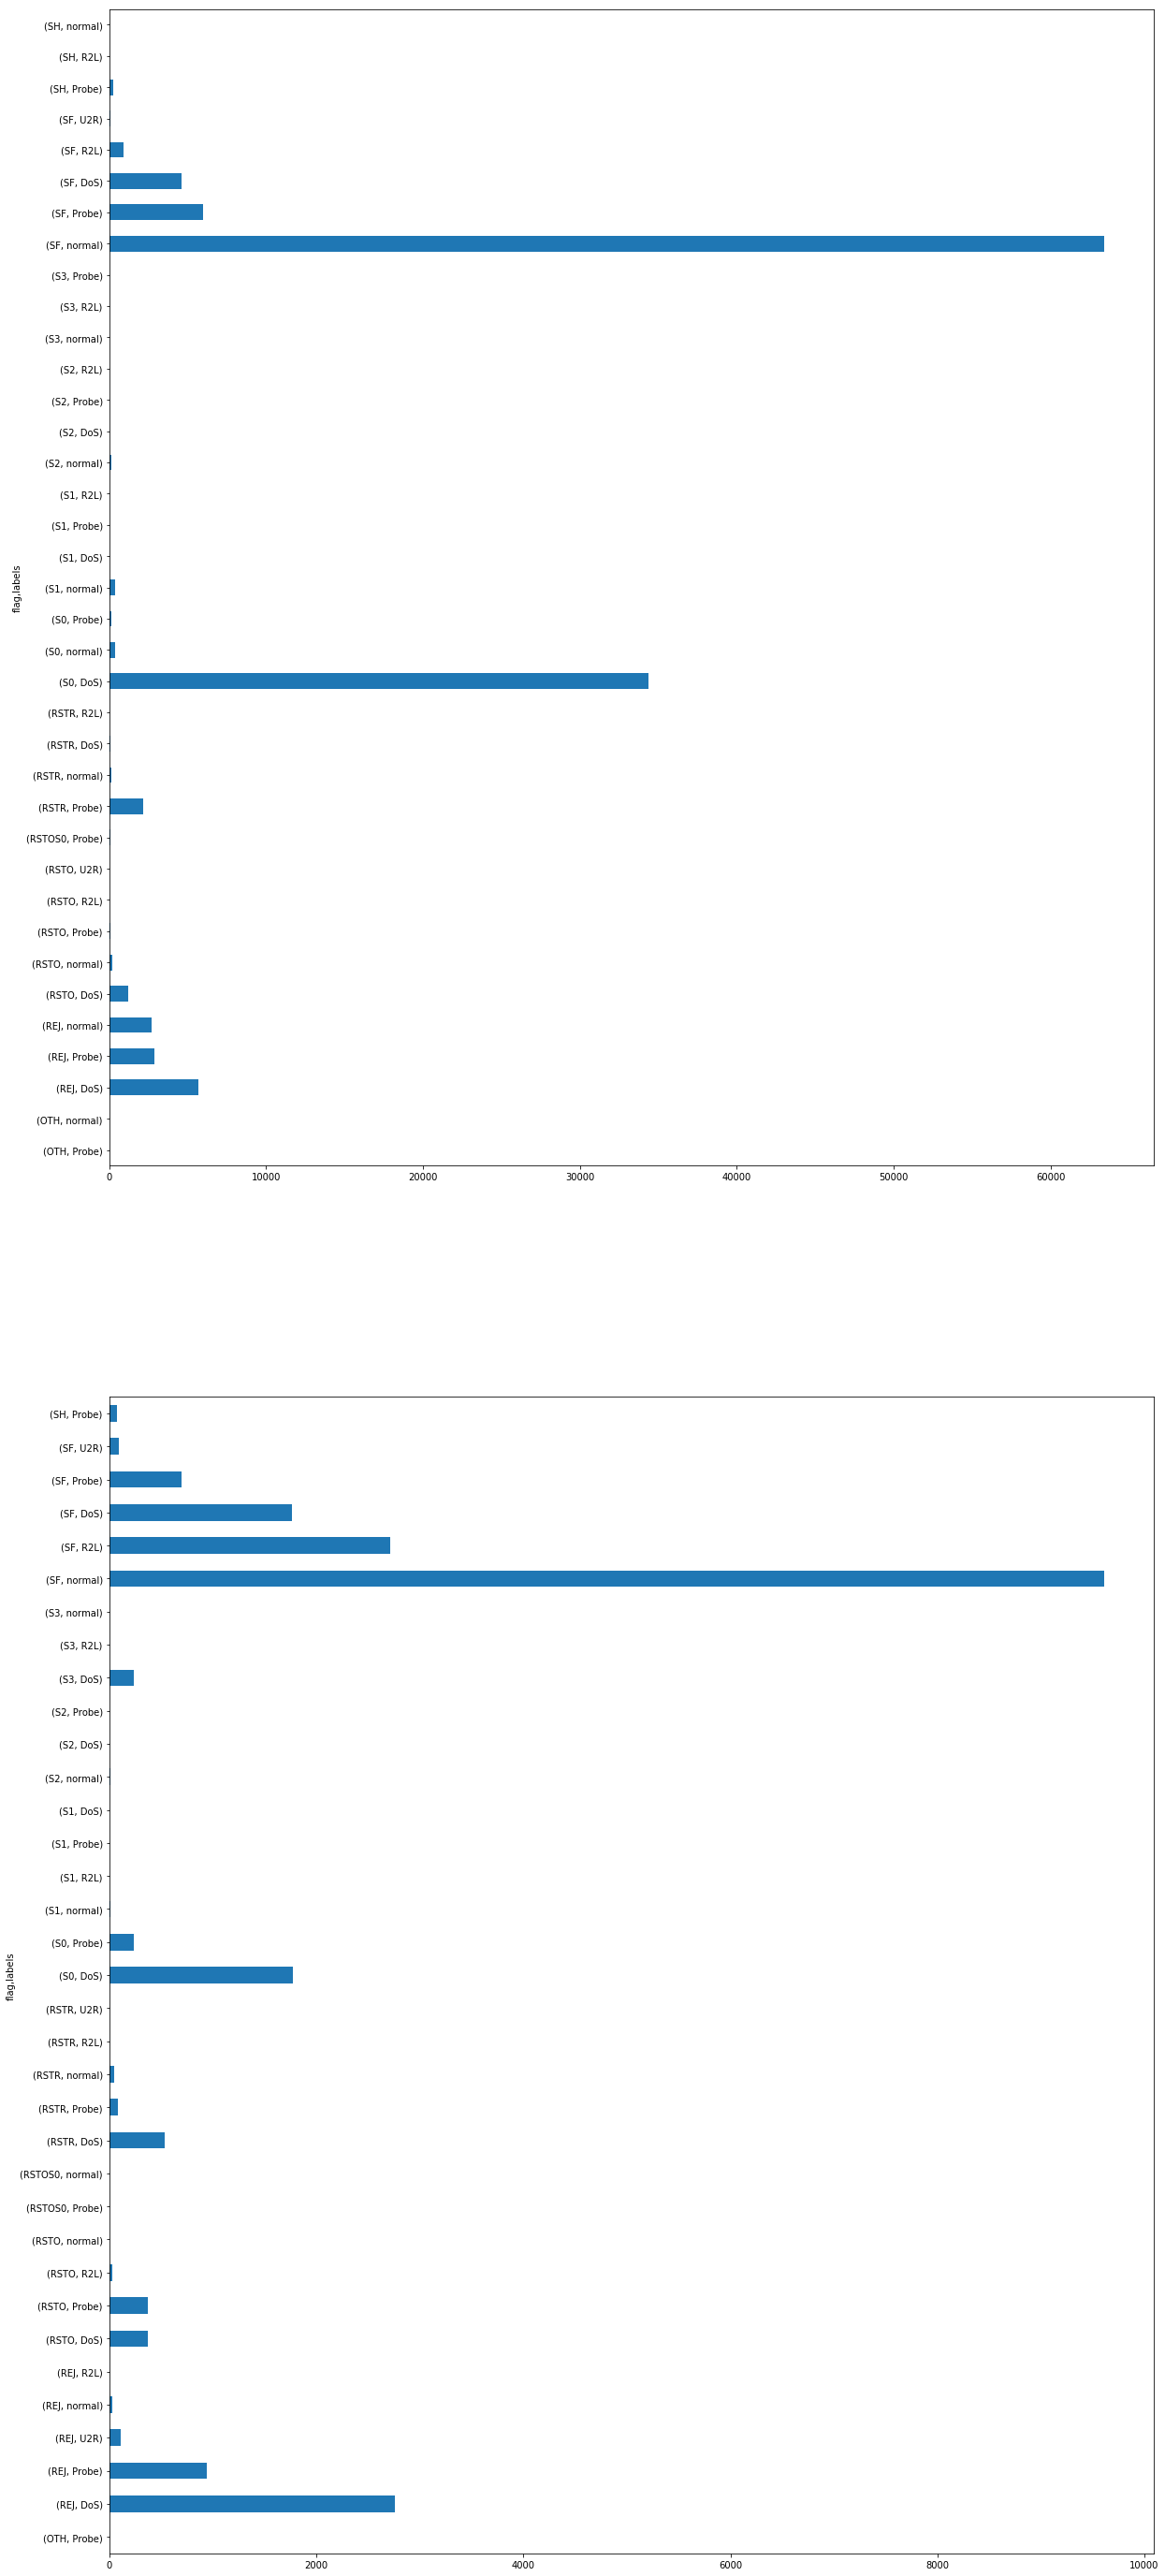

In [16]:
print(train.groupby('flag')['labels'].value_counts().unstack().fillna('null'))

figbi, axesbi = plt.subplots(2,1,figsize=(20, 50))
train.groupby('flag')['labels'].value_counts().plot(kind='barh',ax=axesbi[0])

print("--------------------------------------------")
print(test.groupby('flag')['labels'].value_counts().unstack().fillna('null'))

test.groupby('flag')['labels'].value_counts().plot(kind='barh',ax=axesbi[1])

This table below is created to see whether all binary variables are acutally binary or not. It can be seen that the variable 'su_attempted' has 3 values. Therefore, value 2.0 is replaced by 0.0 in train as well as test data sets.

In [17]:
(train[binary_cols].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [18]:
print(train.groupby('su_attempted')['labels'].value_counts().unstack().fillna('null'))
print('--------------------------------------------------------------------------')
print(test.groupby('su_attempted')['labels'].value_counts().unstack().fillna('null'))

labels          DoS  Probe   R2L   U2R   normal
su_attempted                                   
0             45927  11656   994    52  67264.0
1              null   null     1  null     20.0
2              null   null  null  null     59.0
--------------------------------------------------------------------------
labels         DoS Probe   R2L   U2R  normal
su_attempted                                
0             7458  2421  2754   199  9708.0
1             null  null  null     1     1.0
2             null  null  null  null     2.0


In [19]:
train['su_attempted'] = train['su_attempted'].replace(2.0, 0.0)
(train[binary_cols].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.000167,0.012910,0.0,0.0,0.0,0.0,1.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [20]:
test['su_attempted'] = test['su_attempted'].replace(2.0, 0.0)
(test[binary_cols].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
land,22544.0,0.000311,0.017619,0.0,0.0,0.0,0.0,1.0
logged_in,22544.0,0.442202,0.496659,0.0,0.0,0.0,1.0,1.0
root_shell,22544.0,0.002440,0.049334,0.0,0.0,0.0,0.0,1.0
su_attempted,22544.0,0.000089,0.009419,0.0,0.0,0.0,0.0,1.0
is_host_login,22544.0,0.000488,0.022084,0.0,0.0,0.0,0.0,1.0
is_guest_login,22544.0,0.028433,0.166211,0.0,0.0,0.0,0.0,1.0


'num_outbound_cmds' has a value 0 for every reading in tain and test data sets. Therefore it is redundant and hence is removed from train and test data sets.

In [21]:
train[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_root,125973.0,0.302192,2.439962e+01,0.0,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.012669,4.839351e-01,0.0,0.00,0.00,0.00,4.300000e+01


In [22]:
test[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22544.0,10395.450231,472786.431088,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22544.0,2056.018808,21219.297609,0.0,0.00,46.00,601.0000,1345927.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0
num_root,22544.0,0.114665,8.041614,0.0,0.00,0.00,0.0000,878.0
num_file_creations,22544.0,0.008738,0.676842,0.0,0.00,0.00,0.0000,100.0


Distribution of 'num_outbound_cmds' for every intrusion type is shown below. This is done to actually see whether this feature has zero value across all rows of train and test data sets.

In [23]:
print(train.groupby('num_outbound_cmds')['labels'].value_counts().unstack().fillna('null'))
print('---------------------------------------------------------')
print(test.groupby('num_outbound_cmds')['labels'].value_counts().unstack().fillna('null'))

labels               DoS  Probe  R2L  U2R  normal
num_outbound_cmds                                
0                  45927  11656  995   52   67343
---------------------------------------------------------
labels              DoS  Probe   R2L  U2R  normal
num_outbound_cmds                                
0                  7458   2421  2754  200    9711


In [24]:
train.drop('num_outbound_cmds', axis=1, inplace=True)
test.drop('num_outbound_cmds', axis=1, inplace=True)
numeric_cols.remove('num_outbound_cmds')

In [25]:
print(train.columns)
print(test.columns)
print(list(numeric_cols))

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num

## FEATURE SCALING

Scaling is done for all the features, except nominal and binary features, in train and test data sets. 

In [26]:
col_scale=['duration','src_bytes',
       'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised',
        'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
train[col_scale] = sc_x.fit_transform(train[col_scale])

col_scale_test=[]
sc_y=StandardScaler()
test[col_scale] = sc_y.fit_transform(test[col_scale])

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,DoS
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,0,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,0,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [28]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,DoS
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,DoS
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,normal
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,Probe
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,0,-0.059104,-0.019459,-0.113521,...,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,Probe


In [29]:
newTrain=train.copy(deep=True)
newTrain.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,DoS
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,0,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,0,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [30]:
newTest=test.copy(deep=True)
newTest.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,DoS
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,DoS
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,normal
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,0,-0.059104,-0.019459,-0.113521,...,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,Probe
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,0,-0.059104,-0.019459,-0.113521,...,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,Probe


## CREATING DUMMY VARIABLES

Categorical variables like 'service', 'protocol_types' and 'flag' cannot be treated with learning algorithms like random forest and multilayer perceptron. These algorithms only except numerical values and not categorical values. Therefor, these categorical variables are converted to their numerical representation which is very similar to One Hot Encoding concept.

In [31]:
oh = pd.get_dummies(newTrain['protocol_type'])
newTrain = newTrain.drop('protocol_type',axis = 1)
newTrain = newTrain.join(oh)
oh1 = pd.get_dummies(newTrain['service'])
newTrain = newTrain.drop('service',axis = 1)
newTrain = newTrain.join(oh1)
oh2=pd.get_dummies(newTrain['flag'])
newTrain = newTrain.drop('flag',axis = 1)
newTrain = newTrain.join(oh2)
print(newTrain.shape)

(125973, 122)


In [32]:
oh3 = pd.get_dummies(newTest['protocol_type'])
newTest = newTest.drop('protocol_type',axis = 1)
newTest = newTest.join(oh3)
oh4 = pd.get_dummies(newTest['service'])
newTest = newTest.drop('service',axis = 1)
newTest = newTest.join(oh4)
oh5=pd.get_dummies(newTest['flag'])
newTest = newTest.drop('flag',axis = 1)
newTest = newTest.join(oh5)
print(newTest.shape)

(22544, 116)


<b>NOTE:-</b> Test data set, after encoding of categorical variables, have 6 columns less than that of train data sets.

The network intrusion types are now mapped to numerical values in order to facilitate implementation of learning algorithms.

{normal:0, attack:1}

In [33]:
change_attack_dict={
    'normal':0,
    'DoS':1,
    'Probe':1,
    'R2L':1,
    'U2R':1
}

newTrain['labels']=newTrain['labels'].map(change_attack_dict)
print(newTrain['labels'].value_counts())
print("--------------------------------------------")
print(newTrain['labels'].value_counts(normalize=True))
print("--------------------------------------------")
print("--------------------------------------------")
newTest['labels']=newTest['labels'].map(change_attack_dict)
print(newTest['labels'].value_counts())
print("--------------------------------------------")
print(newTrain['labels'].value_counts(normalize=True))

0    67343
1    58630
Name: labels, dtype: int64
--------------------------------------------
0    0.534583
1    0.465417
Name: labels, dtype: float64
--------------------------------------------
--------------------------------------------
1    12833
0     9711
Name: labels, dtype: int64
--------------------------------------------
0    0.534583
1    0.465417
Name: labels, dtype: float64


Columns that are present in train data set but are missing in test data set are created in the test data set as well.

In [34]:
trainservice=train['service'].tolist()
testservice= test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_urh_i',
 'service_red_i',
 'service_harvest',
 'service_aol',
 'service_http_8001']

In [35]:
for col in difference:
    newTest[col] = 0
newTest.shape

(22544, 122)

In [36]:
temp1=newTrain.pop('labels')
newTrain['labels']=temp1
#newTrain.columns
newTrain['labels'].value_counts()

0    67343
1    58630
Name: labels, dtype: int64

In [37]:
temp2=newTest.pop('labels')
newTest['labels']=temp2
#newTest.columns
newTest['labels'].value_counts()

1    12833
0     9711
Name: labels, dtype: int64

## MODEL BUILDING without Feature Selection

First we build models based on the complete data set i.e. with 122 features of train data set and use the model so built to predict test data set, also of 122 features. 

In [44]:
x_train=newTrain.iloc[:,:-1].values
y_train=newTrain.iloc[:,-1].values

x_test=newTest.iloc[:,:-1].values
y_test=newTest.iloc[:,-1].values

from sklearn import metrics
import matplotlib.pyplot as plt_roc

#### RANDOM FOREST 

In [45]:
from time import time
t0=time()

from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
rf1.fit(x_train,y_train)

print(time()-t0)

6.146929502487183


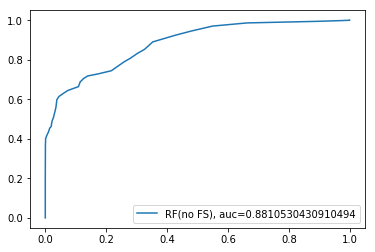

In [47]:
plt_roc.figure(0).clf()
pred_roc_normal = rf1.predict_proba(x_test)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred_roc_normal)
auc = metrics.roc_auc_score(y_test, pred_roc_normal)
plt_roc.plot(fpr,tpr,label="RF(no FS), auc="+str(auc))
plt_roc.legend(loc=0)

In [48]:
#t1=time()
#from sklearn.model_selection import cross_val_score
#accuracies=cross_val_score(rf1,X=x_train,y=y_train,cv=10)
#print('Train Accuracy: '+str(accuracies.mean()))
#print('Train Accuracy (std dev): '+str(accuracies.std()))
#print(time()-t1)

In [67]:
y_pred=rf1.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      9711
           1       0.92      0.64      0.76     12833

   micro avg       0.77      0.77      0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.76     22544

[[8989  722]
 [4557 8276]]


In [68]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.7658356990773598
F1 score:  0.7581878979432917
Precision:  0.9197599466548122
Recall:  0.6448998675290267


In [69]:
#x_categorical_train = train.drop('labels', axis=1)
#y_categorical_train = train.labels.map(change_attack_dict)
#print(x_categorical_train.dtypes)
#x_categorical_test = test.drop('labels', axis=1)
#y_categorical_test = test.labels.map(change_attack_dict)

In [70]:
#t3=time()
#from catboost import CatBoostClassifier
#cate_features = np.where(x_categorical_train.dtypes == object)[0]
#print(cate_features)
#cat_classifier_model=CatBoostClassifier(iterations=50, learning_rate=1, depth=2, loss_function='Logloss',use_best_model=True,random_seed=0)
#cat_classifier_model.fit(x_categorical_train, y_categorical_train, cat_features=cate_features,eval_set=(x_categorical_test,y_categorical_test))
#print(time()-t3)

In [71]:
#y_pred_categorical=cat_classifier_model.predict(x_categorical_test)
#from sklearn.metrics import classification_report, confusion_matrix
#print(classification_report(y_categorical_test, y_pred_categorical))
#print(confusion_matrix(y_categorical_test, y_pred_categorical))

In [72]:
#print("Accuracy: ", accuracy_score(y_categorical_test, y_pred_categorical))
#print("F1 score: ", f1_score(y_categorical_test, y_pred_categorical))
#print("Precision: ", precision_score(y_categorical_test, y_pred_categorical))
#print("Recall: ", recall_score(y_categorical_test, y_pred_categorical))

In [73]:
#t7=time()
#from catboost import CatBoostClassifier, Pool,cv
#accuracies_c=cross_val_score(cat_classifier_model,X=x_train,y=y_train,cv=10)

#cv_data = cv(cat_classifier_model.get_params(),Pool(train.drop('labels', axis=1),train.labels.map(change_attack_dict),
#                                                    cat_features=cate_features),fold_count=10)

#print('the best cv accuracy is :{}'.format(np.max(cv_data["b'Accuracy'_test_avg"])))

#print('Train Accuracy: '+str(accuracies_c.mean()))
#print('Train Accuracy (std dev): '+str(accuracies_c.std()))
#print(time()-t7)

#### MULTILAYER PERCEPTRON

In [100]:
t4=time()
from sklearn.neural_network import MLPClassifier
nn1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(8, 2), random_state=0)
nn1.fit(x_train, y_train)
print(time()-t4)

13.193540334701538


In [64]:
y_pred_nn=nn1.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77      9711
           1       0.91      0.64      0.75     12833

   micro avg       0.76      0.76      0.76     22544
   macro avg       0.79      0.78      0.76     22544
weighted avg       0.80      0.76      0.76     22544

[[8907  804]
 [4585 8248]]


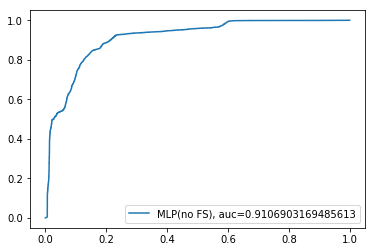

In [74]:
pred_roc_MLP_normal = nn1.predict_proba(x_test)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred_roc_MLP_normal)
auc = metrics.roc_auc_score(y_test, pred_roc_MLP_normal)
plt_roc.plot(fpr,tpr,label="MLP(no FS), auc="+str(auc))
plt_roc.legend(loc=0)

In [75]:
print("Accuracy: ", accuracy_score(y_test, y_pred_nn))
print("F1 score: ", f1_score(y_test, y_pred_nn))
print("Precision: ", precision_score(y_test, y_pred_nn))
print("Recall: ", recall_score(y_test, y_pred_nn))

Accuracy:  0.7609563520227112
F1 score:  0.7537582819282613
Precision:  0.9111798497569598
Recall:  0.6427179926751344


In [51]:
#from sklearn.feature_selection import SelectKBest, chi2
#bestfeatures = SelectKBest(score_func=chi2, k=20)
#fit = bestfeatures.fit(newTrain.drop('labels', axis=1),newTrain['labels'])
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(newTrain.drop('labels', axis=1).columns)
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']
#print(featureScores.nlargest(20,'Score'))

#xx=newTrain.iloc[:,:-1].values
#yy=newTrain.iloc[:,-1].values
#from sklearn.feature_selection import chi2
#scores,pvalues=chi2(xx,yy)

## FEATURE SELECTION

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features. Thus, feature selection is a very important part of machine learning.

### 1) FEATURE IMPORTANCE

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

[3.92715551e-03 1.15218988e-01 1.54200678e-01 2.48621939e-05
 2.70696493e-03 2.25920724e-05 8.94574571e-03 2.82606240e-04
 2.71665983e-02 5.65207378e-03 1.51008868e-04 7.44332657e-06
 3.30765843e-04 1.78495781e-04 6.59228763e-05 5.76972825e-05
 2.14913247e-10 8.15803451e-04 3.44543839e-02 1.57588129e-02
 1.85815904e-02 2.84762695e-03 1.14550062e-02 3.02584353e-03
 5.60734327e-02 1.58995540e-02 2.57904717e-03 1.45667407e-02
 3.55923285e-02 5.38510094e-02 4.73580358e-02 2.64204469e-02
 1.71865518e-02 1.57833493e-02 3.80818283e-02 7.53421762e-03
 6.66423117e-03 2.34040333e-02 7.62165682e-03 3.58899574e-03
 3.81446077e-04 6.94504199e-05 1.17112338e-08 0.00000000e+00
 1.11147457e-04 2.35347907e-08 2.13413255e-08 1.06753088e-08
 2.82260129e-06 3.11015518e-06 3.64871366e-06 3.98109332e-05
 2.54874356e-03 2.00903967e-06 1.17312156e-02 8.92316728e-03
 3.80894230e-07 1.87446338e-09 3.00114286e-04 7.04116519e-04
 9.22832614e-03 3.37446849e-05 0.00000000e+00 1.01459561e-08
 1.80096912e-02 0.000000

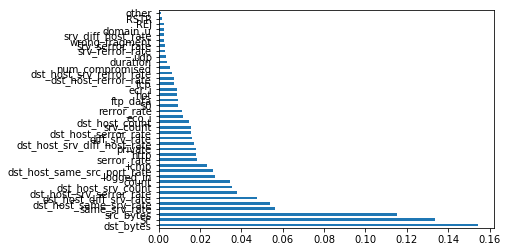

0.39882516860961914


In [49]:
tt=time()
print(rf1.feature_importances_)
feat_importances = pd.Series(rf1.feature_importances_, index=newTrain.iloc[:,:-1].columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()
print(time()-tt)

In [50]:
#NAME OF TOP 30 SIGNIFICANT FEATURES 
print(feat_importances.nlargest(18))

dst_bytes                      0.154201
SF                             0.133679
src_bytes                      0.115219
same_srv_rate                  0.056073
dst_host_same_srv_rate         0.053851
dst_host_diff_srv_rate         0.047358
dst_host_srv_serror_rate       0.038082
dst_host_srv_count             0.035592
count                          0.034454
logged_in                      0.027167
dst_host_same_src_port_rate    0.026420
icmp                           0.023404
serror_rate                    0.018582
http                           0.018010
private                        0.017866
dst_host_srv_diff_host_rate    0.017187
diff_srv_rate                  0.015900
dst_host_serror_rate           0.015783
dtype: float64


In [54]:
imp_cols_5=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate","labels"]
imp_cols_24=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data","labels"]
imp_cols_28=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","labels"]
imp_cols_27=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","labels"]
imp_cols_26=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data","hot",
             "ecr_i","labels"]
imp_cols_25=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data","hot","labels"]
imp_cols_23=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","labels"]
imp_cols_22=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","labels"]
imp_cols_21=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","labels"]
imp_cols_20=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","labels"]
imp_cols_19=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","labels"]
imp_cols_15=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","labels"]
imp_cols_14=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","labels"]
imp_cols_11=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "labels"]
imp_cols_16=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","labels"]
imp_cols_17=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate","labels"]
imp_cols_18=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","labels"]
imp_cols_13=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","labels"]
imp_cols_10=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","labels"]
imp_cols_9=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","labels"]
imp_cols_30=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","dst_host_srv_rerror_rate","num_compromised","labels"]
imp_cols_29=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","dst_host_srv_rerror_rate","labels"]
imp_cols_32=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","dst_host_srv_rerror_rate","num_compromised","duration",
             "udp","labels"]
imp_cols_35=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","dst_host_srv_rerror_rate","num_compromised","duration",
             "udp","srv_rerror_rate","srv_serror_rate","wrong_fragment","labels"]
imp_cols_37=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","dst_host_srv_rerror_rate","num_compromised","duration",
             "udp","srv_rerror_rate","srv_serror_rate","wrong_fragment","srv_diff_host_rate","domain_u","labels"]
imp_cols_40=["dst_bytes","SF","src_bytes","same_srv_rate","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_srv_serror_rate","dst_host_srv_count","count","logged_in","dst_host_same_src_port_rate",
             "icmp","serror_rate","http","private","dst_host_srv_diff_host_rate","diff_srv_rate",
             "dst_host_serror_rate","srv_count","dst_host_count","eco_i","rerror_rate","S0","ftp_data",
             "hot","ecr_i","tcp","dst_host_rerror_rate","dst_host_srv_rerror_rate","num_compromised","duration",
             "udp","srv_rerror_rate","srv_serror_rate","wrong_fragment","srv_diff_host_rate","domain_u",
             "REJ","RSTR","other","labels"]
i_cols=imp_cols_9
i_colsMLP=imp_cols_37
new_df_train=newTrain[i_cols].copy(deep=True)
new_df_test=newTest[i_cols].copy(deep=True)
print(new_df_train.columns)
print(new_df_test.columns)

Index(['dst_bytes', 'SF', 'src_bytes', 'same_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_count', 'count', 'labels'],
      dtype='object')
Index(['dst_bytes', 'SF', 'src_bytes', 'same_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_serror_rate', 'dst_host_srv_count', 'count', 'labels'],
      dtype='object')


In [55]:
x_new_train=new_df_train.iloc[:,:-1].values
y_new_train=new_df_train.iloc[:,-1].values

x_new_test=new_df_test.iloc[:,:-1].values
y_new_test=new_df_test.iloc[:,-1].values

#### FEATURE IMPORTANCE -> RANDOM FOREST

The features selected using the Feature Importance technique are now learned by applying random forest classifier.

In [56]:
from time import time
t5=time()

from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
rf2.fit(x_new_train,y_new_train)

print(time()-t5)

3.59428071975708


In [57]:
y_pred_newRF=rf2.predict(x_new_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_new_test, y_pred_newRF))
print(confusion_matrix(y_new_test, y_pred_newRF))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      9711
           1       0.82      0.85      0.84     12833

   micro avg       0.81      0.81      0.81     22544
   macro avg       0.81      0.80      0.81     22544
weighted avg       0.81      0.81      0.81     22544

[[ 7336  2375]
 [ 1882 10951]]


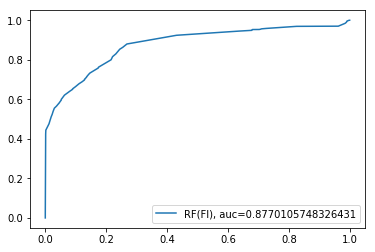

In [58]:
pred_roc_rfFI = rf2.predict_proba(x_new_test)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_new_test, pred_roc_rfFI)
auc = metrics.roc_auc_score(y_new_test, pred_roc_rfFI)
plt_roc.plot(fpr,tpr,label="RF(FI), auc="+str(auc))
plt_roc.legend(loc=0)

In [81]:
#t6=time()
#from sklearn.model_selection import cross_val_score
#accuraciesNew=cross_val_score(rf2,X=x_new_train,y=y_new_train,cv=10)
#print('Train Accuracy: '+str(accuraciesNew.mean()))
#print('Train Accuracy (std dev): '+str(accuraciesNew.std()))
#print(time()-t6)

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(y_new_test, y_pred_newRF))
print("F1 score: ", f1_score(y_new_test, y_pred_newRF))
print("Precision: ", precision_score(y_new_test, y_pred_newRF))
print("Recall: ", recall_score(y_new_test, y_pred_newRF))

Accuracy:  0.8111692689850958
F1 score:  0.8372644214228372
Precision:  0.8217769773375356
Recall:  0.8533468401776669


#### FEAURE IMPORTANCE -> MULTILAYER PERCEPTRON

The features selected using the Feature Importance technique are now learned by applying Multilayer Perceptron.

In [59]:
i_colsMLP=imp_cols_37
new_df_trainMLP=newTrain[i_colsMLP].copy(deep=True)
new_df_testMLP=newTest[i_colsMLP].copy(deep=True)

x_new_trainMLP=new_df_trainMLP.iloc[:,:-1].values
y_new_trainMLP=new_df_trainMLP.iloc[:,-1].values

x_new_testMLP=new_df_testMLP.iloc[:,:-1].values
y_new_testMLP=new_df_testMLP.iloc[:,-1].values

In [60]:
t8=time()
from sklearn.neural_network import MLPClassifier
nn2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(8, 2), random_state=0)
nn2.fit(x_new_trainMLP, y_new_trainMLP)
print(time()-t8)

9.056200504302979


In [62]:
y_pred_nn2=nn2.predict(x_new_testMLP)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_new_testMLP, y_pred_nn2))
print(confusion_matrix(y_new_testMLP, y_pred_nn2))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79      9711
           1       0.93      0.66      0.78     12833

   micro avg       0.78      0.78      0.78     22544
   macro avg       0.80      0.80      0.78     22544
weighted avg       0.82      0.78      0.78     22544

[[9083  628]
 [4316 8517]]


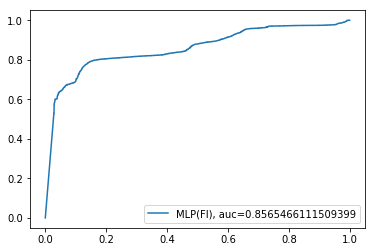

In [63]:
pred_roc_MLPFI = nn2.predict_proba(x_new_testMLP)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_new_testMLP, pred_roc_MLPFI)
auc = metrics.roc_auc_score(y_new_testMLP, pred_roc_MLPFI)
plt_roc.plot(fpr,tpr,label="MLP(FI), auc="+str(auc))
plt_roc.legend(loc=0)

In [66]:
print("Accuracy: ", accuracy_score(y_new_testMLP, y_pred_nn2))
print("F1 score: ", f1_score(y_new_testMLP, y_pred_nn2))
print("Precision: ", precision_score(y_new_testMLP, y_pred_nn2))
print("Recall: ", recall_score(y_new_testMLP, y_pred_nn2))

Accuracy:  0.7806955287437899
F1 score:  0.775047775047775
Precision:  0.9313285948605795
Recall:  0.6636795760928855


Creating a list that contains all the features obtained after creating dummy variables for every categorical feature.

In [67]:
colNames=list(newTrain.columns)
print(colNames)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'icmp', 'tcp', 'udp', 'IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshe

### 2) RECURSIVE FEATURE ELIMINATION (RFE)

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

In [69]:
t9=time()
from sklearn.feature_selection import RFE
rf3 = RandomForestClassifier(criterion='gini',random_state=0)
rfe = RFE(estimator=rf3, n_features_to_select=11, step=1)
rfe.fit(newTrain.iloc[:,:-1], newTrain.iloc[:,-1])
X_rfe=rfe.transform(newTrain.iloc[:,:-1])
true=rfe.support_
rfecolindex=[i for i, z in enumerate(true) if z]
rfecolname=list(colNames[i] for i in rfecolindex)
print(time()-t9)

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-package

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-package

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-package

/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vinay/anaconda3/lib/python3.6/site-package

124.46629095077515


In [70]:
rfecolname.append('labels')
print('Features selected:',rfecolname)

Features selected: ['src_bytes', 'dst_bytes', 'hot', 'count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate', 'icmp', 'SF', 'labels']


In [71]:
train_rfe=newTrain[rfecolname].copy(deep=True)
train_rfe.shape

(125973, 12)

In [72]:
test_rfe=newTest[rfecolname].copy(deep=True)
test_rfe.shape

(22544, 12)

In [73]:
x_train_rfe=train_rfe.iloc[:,:-1].values
y_train_rfe=train_rfe.iloc[:,-1].values

x_test_rfe=test_rfe.iloc[:,:-1].values
y_test_rfe=test_rfe.iloc[:,-1].values

#### RFE -> RANDOM FOREST

Random forest is applied on features obtained from RFE. 

In [74]:
t10=time()
rf4=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
rf4.fit(x_train_rfe,y_train_rfe)
print(time()-t10)

3.639644145965576


In [75]:
y_pred_rfe=rf4.predict(x_test_rfe)
print(classification_report(y_test_rfe, y_pred_rfe))
print(confusion_matrix(y_test_rfe, y_pred_rfe))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      9711
           1       0.89      0.79      0.84     12833

   micro avg       0.83      0.83      0.83     22544
   macro avg       0.83      0.83      0.83     22544
weighted avg       0.84      0.83      0.83     22544

[[ 8505  1206]
 [ 2658 10175]]


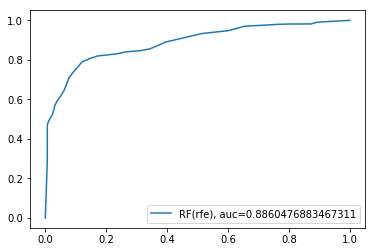

In [76]:
pred_roc_RFrfe = rf4.predict_proba(x_test_rfe)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test_rfe, pred_roc_RFrfe)
auc = metrics.roc_auc_score(y_test_rfe, pred_roc_RFrfe)
plt_roc.plot(fpr,tpr,label="RF(rfe), auc="+str(auc))
plt_roc.legend(loc=0)

In [77]:
print("Accuracy: ", accuracy_score(y_test_rfe, y_pred_rfe))
print("F1 score: ", f1_score(y_test_rfe, y_pred_rfe))
print("Precision: ", precision_score(y_test_rfe, y_pred_rfe))
print("Recall: ", recall_score(y_test_rfe, y_pred_rfe))

Accuracy:  0.8286018452803406
F1 score:  0.8404228958453788
Precision:  0.894033916176083
Recall:  0.7928777370840802


#### RFE -> MLP

Multilayer Perceptron is applied on features obtained from RFE. 

In [78]:
t11=time()
nn3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(8, 2), random_state=0)
nn3.fit(x_train_rfe,y_train_rfe)
print(time()-t11)

7.63211464881897


In [98]:
y_pred_rfe_nn=nn3.predict(x_test_rfe)
print(classification_report(y_test_rfe, y_pred_rfe_nn))
print(confusion_matrix(y_test_rfe, y_pred_rfe_nn))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      9711
           1       0.95      0.75      0.84     12833

   micro avg       0.84      0.84      0.84     22544
   macro avg       0.85      0.85      0.84     22544
weighted avg       0.86      0.84      0.84     22544

[[9224  487]
 [3219 9614]]


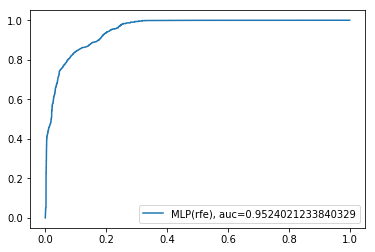

In [108]:
pred_roc_MLP_rfe = nn3.predict_proba(x_test_rfe)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test_rfe, pred_roc_MLP_rfe)
auc = metrics.roc_auc_score(y_test_rfe, pred_roc_MLP_rfe)
plt_roc.plot(fpr,tpr,label="MLP(rfe), auc="+str(auc))
plt_roc.legend(loc=0)

In [109]:
print("Accuracy: ", accuracy_score(y_test_rfe, y_pred_rfe_nn))
print("F1 score: ", f1_score(y_test_rfe, y_pred_rfe_nn))
print("Precision: ", precision_score(y_test_rfe, y_pred_rfe_nn))
print("Recall: ", recall_score(y_test_rfe, y_pred_rfe_nn))

Accuracy:  0.8356103619588361
F1 score:  0.8384058602947588
Precision:  0.9517869517869518
Recall:  0.7491623159043092


In [110]:
#t12=time()
#from sklearn.decomposition import PCA
#pca=PCA(n_components=30)
#x_pca_train=pca.fit_transform(x_train)
#x_pca_test=pca.transform(x_test)
#print(time()-t12)

In [111]:
#t13=time()
#rf5=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)
#rf5.fit(x_pca_train,y_train)
#print(time()-t13)

In [112]:
#y_pred_pca=rf5.predict(x_pca_test)
#print(classification_report(y_test, y_pred_pca))
#print(confusion_matrix(y_test, y_pred_pca))

In [113]:
#print("Accuracy: ", accuracy_score(y_test, y_pred_pca))
#print("F1 score: ", f1_score(y_test, y_pred_pca))
#print("Precision: ", precision_score(y_test, y_pred_pca))
#print("Recall: ", recall_score(y_test, y_pred_pca))

In [114]:
#t14=time()
#nn4 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 5), random_state=0)
#nn4.fit(x_pca_train,y_train)
#print(time()-t14)

In [115]:
#y_pred_pca_nn=nn3.predict(x_pca_test)
#print(classification_report(y_test, y_pred_pca_nn))
#print(confusion_matrix(y_test, y_pred_pca_nn))

In [116]:
#print("Accuracy: ", accuracy_score(y_test, y_pred_pca_nn))
#print("F1 score: ", f1_score(y_test, y_pred_pca_nn))
#print("Precision: ", precision_score(y_test, y_pred_pca_nn))
#print("Recall: ", recall_score(y_test, y_pred_pca_nn))

In [117]:
#from sklearn.feature_selection import RFECV
#from sklearn.model_selection import StratifiedKFold

#target = 'labels'
#features = [col for col in train_rfe.columns if col != target]

#zxc = train_rfe[features]
#asd = train_rfe[target]

#cv = StratifiedKFold(5)
#oz = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

#oz.fit(zxc, asd)
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.title('RFECV')
#plt.plot(range(1, len(oz.grid_scores_) + 1), oz.grid_scores_)
#plt.show()

### 3) ANOVA-F TEST 

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled.

In [87]:
t15=time()
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=24)
x_anova = selector.fit_transform(newTrain.iloc[:,:-1],newTrain.iloc[:,-1])
print(x_anova.shape)
ttrue=selector.get_support()
newcolindex=[i for i, x in enumerate(ttrue) if x]
newcolname=list( colNames[i] for i in newcolindex)
print(time()-t15)
#newcolname_DoS

(125973, 29)
0.43532752990722656


In [88]:
newcolname.append('labels')
print('Features selected:',newcolname)

Features selected: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'icmp', 'udp', 'domain_u', 'eco_i', 'ecr_i', 'http', 'private', 'smtp', 'REJ', 'RSTR', 'S0', 'SF', 'labels']


In [89]:
train_anova=newTrain[newcolname].copy(deep=True)
print(train_anova.shape)
test_anova=newTest[newcolname].copy(deep=True)
print(test_anova.shape)

(125973, 30)
(22544, 30)


In [91]:
#x_train_anova=train_anova.iloc[:,:-1].values
#y_train_anova=train_anova.iloc[:,-1].values

#x_test_anova=test_anova.iloc[:,:-1].values
#y_test_anova=test_anova.iloc[:,-1].values

x_train_anovaMLP=train_anova.iloc[:,:-1].values
y_train_anovaMLP=train_anova.iloc[:,-1].values

x_test_anovaMLP=test_anova.iloc[:,:-1].values
y_test_anovaMLP=test_anova.iloc[:,-1].values

#### ANOVA-F TEST -> RANDOM FOREST

Random forest algorithm is applied on features selected from the Anova-F test feature selection technique.

In [83]:
t16=time()
rf6=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=0)
rf6.fit(x_train_anova,y_train_anova)
print(time()-t16)

3.857635498046875


In [132]:
y_pred_anova=rf6.predict(x_test_anova)
print(classification_report(y_test_anova, y_pred_anova))
print(confusion_matrix(y_test_anova, y_pred_anova))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.96      0.60      0.74     12833

   micro avg       0.76      0.76      0.76     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544

[[9422  289]
 [5115 7718]]


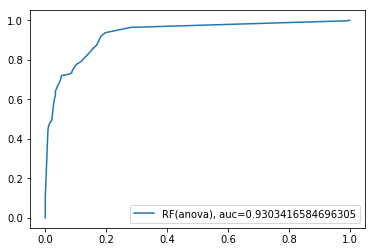

In [135]:
pred_roc_RF_anova = rf6.predict_proba(x_test_anova)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test_anova, pred_roc_RF_anova)
auc = metrics.roc_auc_score(y_test_anova, pred_roc_RF_anova)
plt_roc.plot(fpr,tpr,label="RF(anova), auc="+str(auc))
plt_roc.legend(loc=0)

In [133]:
print("Accuracy: ", accuracy_score(y_test_anova, y_pred_anova))
print("F1 score: ", f1_score(y_test_anova, y_pred_anova))
print("Precision: ", precision_score(y_test_anova, y_pred_anova))
print("Recall: ", recall_score(y_test_anova, y_pred_anova))

Accuracy:  0.7602909865152591
F1 score:  0.7406909788867562
Precision:  0.9639065817409767
Recall:  0.60141821865503


#### ANOVA-F TEST -> MLP

Random forest algorithm is applied on features selected from the Anova-F test feature selection technique.

In [92]:
t17=time()
nn4 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(8, 2), random_state=0)
nn4.fit(x_train_anovaMLP,y_train_anovaMLP)
print(time()-t17)

8.741556644439697


In [93]:
y_pred_anova_nn=nn4.predict(x_test_anovaMLP)
print(classification_report(y_test_anovaMLP, y_pred_anova_nn))
print(confusion_matrix(y_test_anovaMLP, y_pred_anova_nn))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12833

   micro avg       0.80      0.80      0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

[[9445  266]
 [4267 8566]]


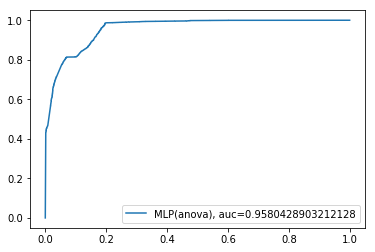

In [94]:
pred_roc_MLP_anova = nn4.predict_proba(x_test_anovaMLP)[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test_anovaMLP, pred_roc_MLP_anova)
auc = metrics.roc_auc_score(y_test_anovaMLP, pred_roc_MLP_anova)
plt_roc.plot(fpr,tpr,label="MLP(anova), auc="+str(auc))
plt_roc.legend(loc=0)

In [126]:
print("Accuracy: ", accuracy_score(y_test_anovaMLP, y_pred_anova_nn))
print("F1 score: ", f1_score(y_test_anovaMLP, y_pred_anova_nn))
print("Precision: ", precision_score(y_test_anovaMLP, y_pred_anova_nn))
print("Recall: ", recall_score(y_test_anovaMLP, y_pred_anova_nn))

Accuracy:  0.7989265436479773
F1 score:  0.7907685206554351
Precision:  0.9698822463768116
Recall:  0.6674978570871971


## ROC CURVES

The ROC curves of all the models used to predict the outcome of the class variable under different feature selection techniques is visualized below.

In [101]:
modelsRF = [
    {
        'label' : 'RF(no FS)',
        'model': rf1,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test               
    },
    {
        'label' : 'RF(FI)',
        'model': rf2,
        'roc_train': x_new_train,
        'roc_test': x_new_test,
        'roc_train_class': y_new_train,        
        'roc_test_class': y_new_test       
    },
    {
        'label' : 'RF(RFE)',
        'model': rf4,
        'roc_train': x_train_rfe,
        'roc_test': x_test_rfe,
        'roc_train_class': y_train_rfe,        
        'roc_test_class': y_test_rfe        
    },    
    {
        'label' : 'RF(Anova)',
        'model': rf6,
        'roc_train': x_train_anova,
        'roc_test': x_test_anova,
        'roc_train_class': y_train_anova,        
        'roc_test_class': y_test_anova        
    }
]
modelsMLP=[
    {
        'label' : 'MLP(no FS)',
        'model': nn1,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test        
    },
    {
        'label' : 'MLP(FI)',
        'model': nn2,
        'roc_train': x_new_trainMLP,
        'roc_test': x_new_testMLP,
        'roc_train_class': y_new_trainMLP,        
        'roc_test_class': y_new_testMLP         
    }, 
    {
        'label' : 'MLP(RFE)',
        'model': nn3,
        'roc_train': x_train_rfe,
        'roc_test': x_test_rfe,
        'roc_train_class': y_train_rfe,        
        'roc_test_class': y_test_rfe        
    },
    {
        'label' : 'MLP(Anova)',
        'model': nn4,
        'roc_train': x_train_anovaMLP,
        'roc_test': x_test_anovaMLP,
        'roc_train_class': y_train_anovaMLP,        
        'roc_test_class': y_test_anovaMLP       
    }   
]
plt.clf()
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 864x720 with 0 Axes>

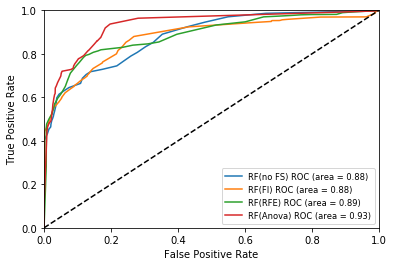

In [97]:
from sklearn.metrics import roc_curve, auc

for m in modelsRF:
    m['model'].probability = True
    probas = m['model'].predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

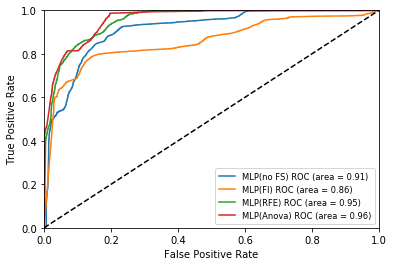

In [102]:
for m in modelsMLP:
    m['model'].probability = True
    probas = m['model'].predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

## RESULTS AND SUMMARY